In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
# load the dataset
df = pd.read_csv("D://M_AI//Machine Learning//Demo Datasets//Lesson 4//train.csv")
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [52]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
# check for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# drop the irrelated columns
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
# check the age median
df['Age'].median()

28.0

In [56]:
# define age function to remove null values
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 22
    else:
        return Age

In [57]:
df.groupby(df.Pclass).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [58]:
# applying the age finvtion to remove null values
df['Age'] = df[['Age','Pclass']].apply(age_approx,axis=1)

In [59]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [60]:
# dropping the embarked null values
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
# check the data types of columns
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [62]:
# get dummies to change Sex and Embarked dtypes ie from categorical to numerical values
df_dummied = pd.get_dummies(df,columns=['Sex'])
df_dummied = pd.get_dummies(df_dummied,columns=['Embarked'])
df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


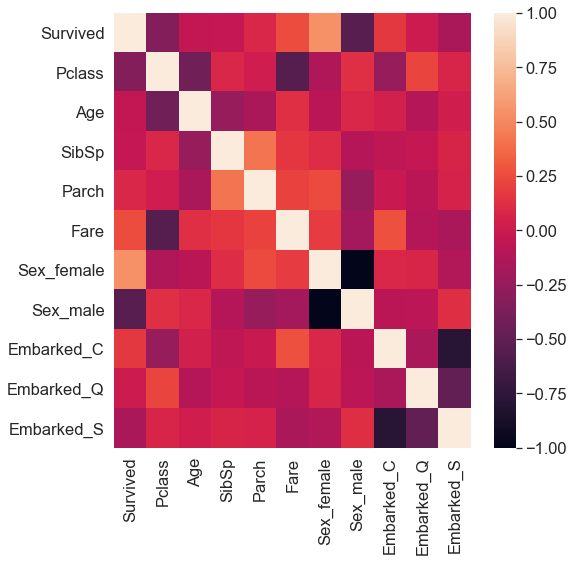

In [63]:
# check the correlation using the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_dummied.corr())

In [64]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
X = df_dummied[used_features].values
y = df.Survived

In [65]:
# split train and test data sets
X_Train,X_test,y_Train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

print(X_Train.shape)
print(X_test.shape)
print(y_Train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [66]:
# call logistic regression 
logReg = LogisticRegression()
logReg.fit(X_Train,y_Train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = logReg.predict(X_test)

In [68]:
metrics.confusion_matrix(y_test,y_pred)

array([[148,  19],
       [ 31,  69]], dtype=int64)

In [69]:
metrics.accuracy_score(y_test,y_pred)

0.8127340823970037

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       167
           1       0.78      0.69      0.73       100

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [71]:
# print coefficients and intercepts
print(logReg.coef_)
print(logReg.intercept_)

[[-1.23332697 -0.04619549 -0.28382778 -0.11209744  1.3161125  -1.32021766
   0.11237305  0.02155733 -0.13803554]]
[4.16526984]


In [72]:
# predict surviving probability
logReg.predict_proba(X_test)

array([[0.85306639, 0.14693361],
       [0.85306639, 0.14693361],
       [0.54649367, 0.45350633],
       [0.03750402, 0.96249598],
       [0.95487127, 0.04512873],
       [0.88176643, 0.11823357],
       [0.44736927, 0.55263073],
       [0.82653429, 0.17346571],
       [0.36597937, 0.63402063],
       [0.04706081, 0.95293919],
       [0.74137186, 0.25862814],
       [0.71676598, 0.28323402],
       [0.08569518, 0.91430482],
       [0.88176643, 0.11823357],
       [0.27885301, 0.72114699],
       [0.92309571, 0.07690429],
       [0.21426748, 0.78573252],
       [0.89546784, 0.10453216],
       [0.10993849, 0.89006151],
       [0.87955879, 0.12044121],
       [0.90220335, 0.09779665],
       [0.13479434, 0.86520566],
       [0.91104908, 0.08895092],
       [0.90380555, 0.09619445],
       [0.91155442, 0.08844558],
       [0.36942739, 0.63057261],
       [0.89363496, 0.10636504],
       [0.96290753, 0.03709247],
       [0.10313385, 0.89686615],
       [0.88649822, 0.11350178],
       [0.